# Superstore Marketing campaign classification dataset

A superstore planning for the end_year sale.they want to lauch a new offer gold membership that give a 20% discount the purchase for only 499 which is as 999 on the other days it will be valid for exiting customer and campaign through phone call is current being planned for them the managment feel that the best way to reduce the cost of campaign is to make predictive model which willclassify customer who might be purchase the after.

In this dataset we have 2240 rows and 22columns we will be analysis the data and preprocessing the data using machine learning classification models to achive our goals.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv("C:\\Users\\Shivam\\Downloads\\superstore_data.csv")
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [3]:
data.shape

(2240, 22)

In [4]:
data.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Data preprocessing

In [6]:
data.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [7]:
data['Complain'].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

In [8]:
data['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

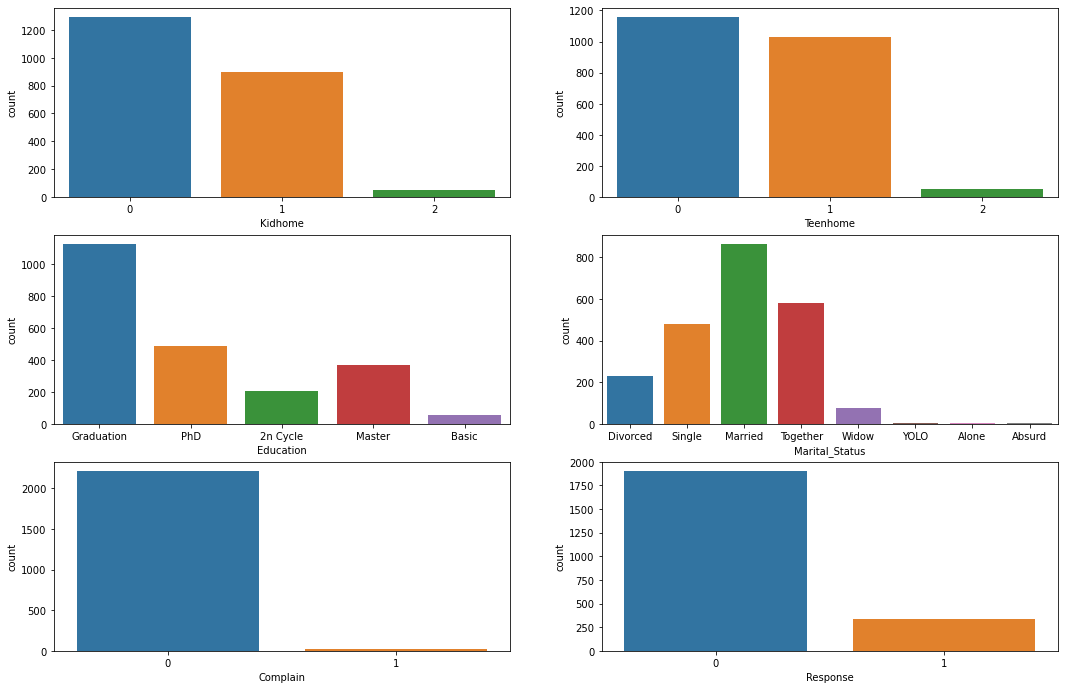

In [9]:
plt.figure(figsize=(18,16))
plt.subplot(4,2,1)
sns.countplot(x='Kidhome',data=data)

plt.subplot(4,2,2)
sns.countplot(x='Teenhome',data=data)

plt.subplot(4,2,3)
sns.countplot(x='Education',data=data)

plt.subplot(4,2,4)
sns.countplot(x='Marital_Status',data=data)

plt.subplot(4,2,5)
sns.countplot(x='Complain',data=data)

plt.subplot(4,2,6)
sns.countplot(x='Response',data=data)

plt.show()

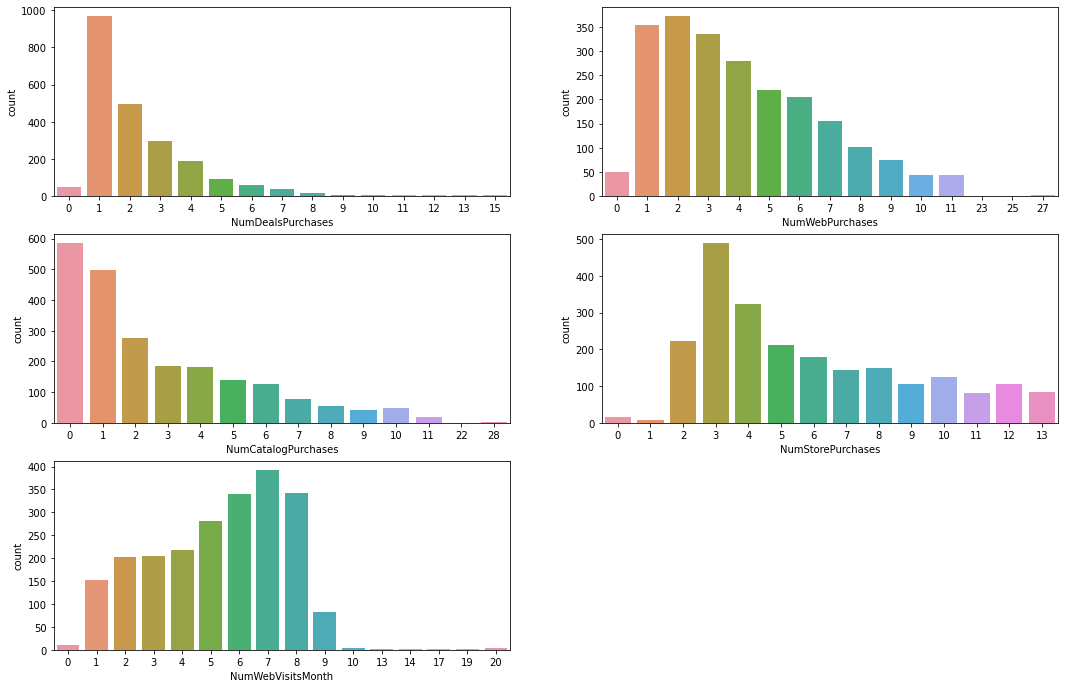

In [10]:
plt.figure(figsize=(18,16))
plt.subplot(4,2,1)
sns.countplot(x='NumDealsPurchases',data=data)

plt.subplot(4,2,2)
sns.countplot(x='NumWebPurchases',data=data)

plt.subplot(4,2,3)
sns.countplot(x='NumCatalogPurchases',data=data)

plt.subplot(4,2,4)
sns.countplot(x='NumStorePurchases',data=data)

plt.subplot(4,2,5)
sns.countplot(x='NumWebVisitsMonth',data=data)

plt.show()

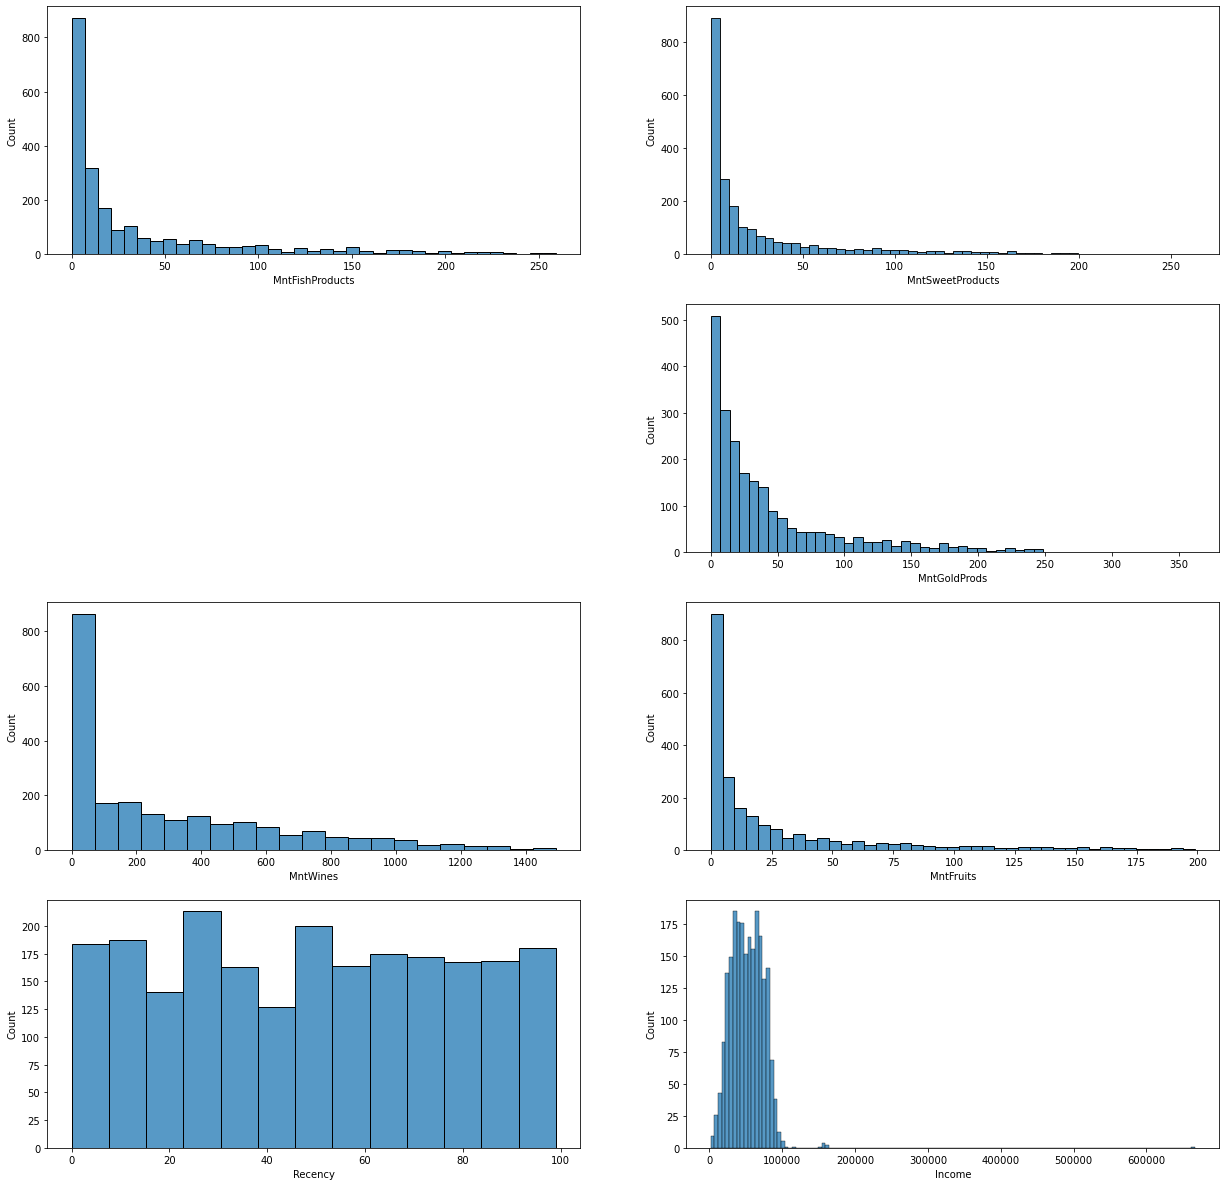

In [11]:
plt.figure(figsize=(21,21))
plt.subplot(4,2,1)
sns.histplot(data['MntFishProducts'])

plt.subplot(4,2,2)
sns.histplot(data['MntSweetProducts'])

plt.subplot(4,2,4)
sns.histplot(data['MntGoldProds'])

plt.subplot(4,2,5)
sns.histplot(data['MntWines'])

plt.subplot(4,2,6)
sns.histplot(data['MntFruits'])

plt.subplot(4,2,7)
sns.histplot(data['Recency'])

plt.subplot(4,2,8)
sns.histplot(data['Income'])


plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

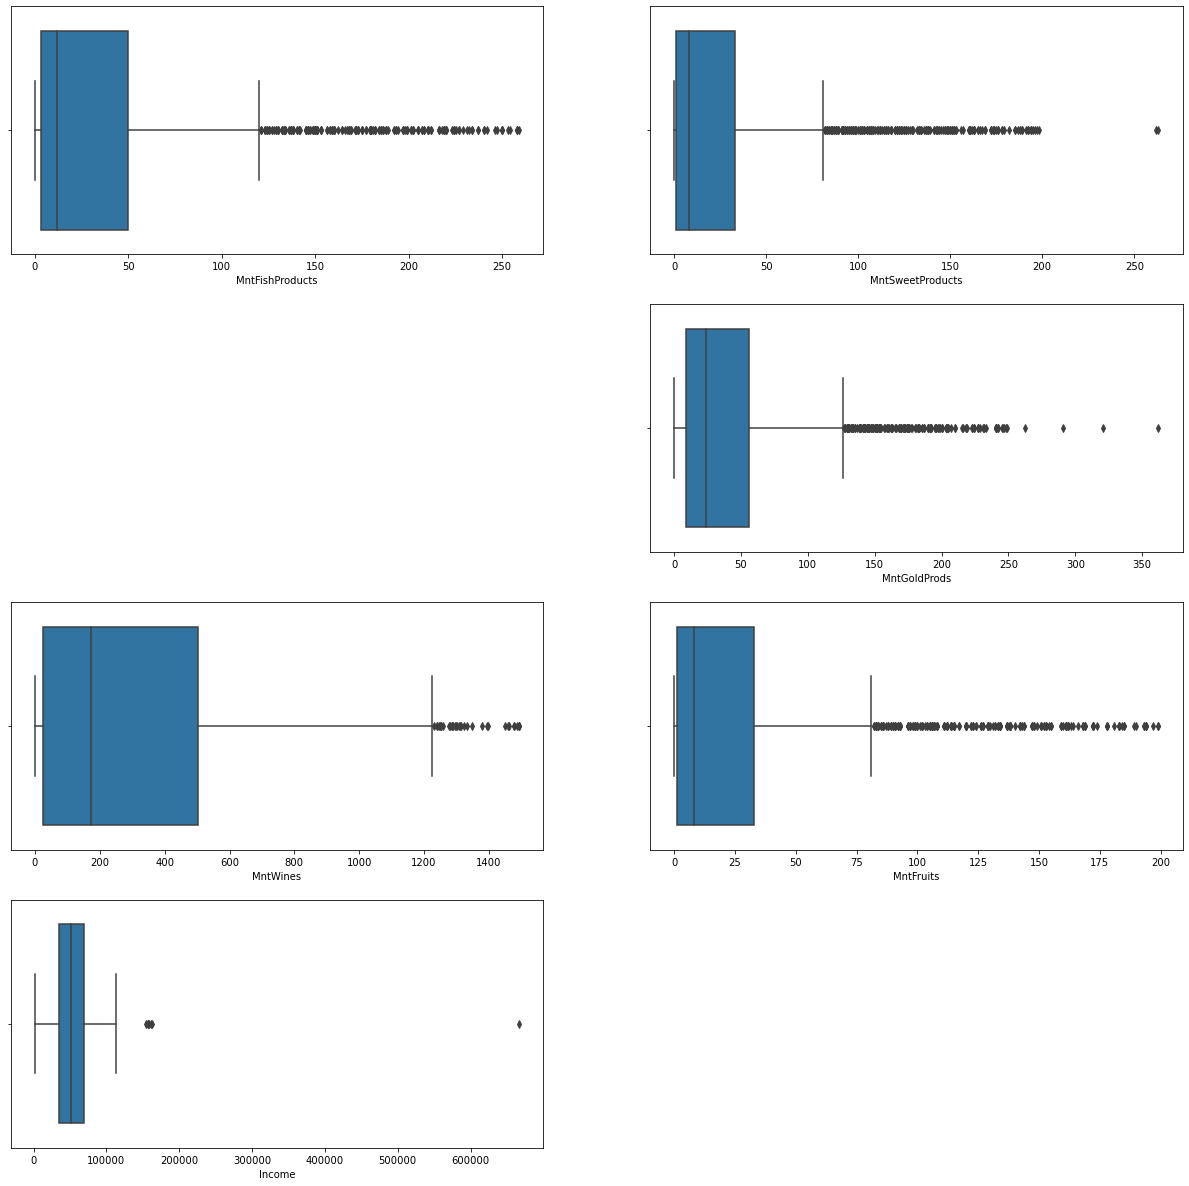

In [12]:
plt.figure(figsize=(21,21))
plt.subplot(4,2,1)
sns.boxplot(data['MntFishProducts'])

plt.subplot(4,2,2)
sns.boxplot(data['MntSweetProducts'])

plt.subplot(4,2,4)
sns.boxplot(data['MntGoldProds'])

plt.subplot(4,2,5)
sns.boxplot(data['MntWines'])

plt.subplot(4,2,6)
sns.boxplot(data['MntFruits'])

plt.subplot(4,2,7)
sns.boxplot(data['Income'])


plt.show

<AxesSubplot:xlabel='Income'>

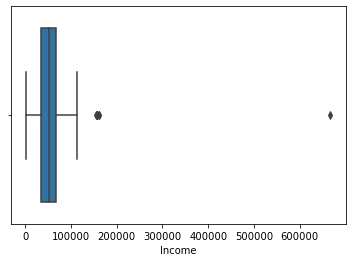

In [13]:
sns.boxplot(x=data['Income'])

In [14]:
q1=data['Income'].quantile(0.25)
q3=data['Income'].quantile(0.75)
IQR= q3-q1

lower_limit = q1-(IQR*1.5)
upper_limit = q3 +(IQR*1.5)
lower_limit,upper_limit


(-14525.5, 118350.5)

In [15]:
data[data['Income']<40000]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
13,2964,1981,Graduation,Married,26872.0,0,0,10/16/2013,0,3,...,3,16,32,1,1,1,2,6,0,0
14,10311,1969,Graduation,Married,4428.0,0,1,5/10/2013,0,16,...,2,4,321,0,25,0,0,1,0,0
17,10175,1958,PhD,Divorced,32173.0,0,1,1/8/2013,0,18,...,0,0,2,1,1,0,3,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,10001,1985,2n Cycle,Together,7500.0,1,0,1/8/2012,98,5,...,13,14,34,4,2,1,3,9,0,0
2229,2106,1974,2n Cycle,Married,20130.0,0,0,3/17/2014,99,0,...,7,6,12,1,1,0,3,8,0,0
2230,3363,1974,2n Cycle,Married,20130.0,0,0,3/17/2014,99,0,...,7,6,12,1,1,0,3,8,0,0
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/2013,99,15,...,7,4,25,1,2,1,2,5,0,1


In [16]:
data_df=data[(data['Income']>lower_limit)&(data['Income']<upper_limit)]


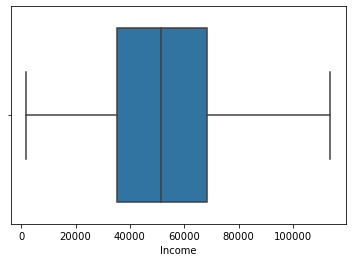

In [17]:
sns.boxplot(x=data_df['Income'])
plt.show()

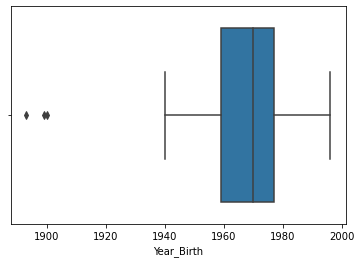

In [18]:
sns.boxplot(x=data['Year_Birth'])
plt.show()

In [19]:
q1=data['Year_Birth'].quantile(0.25)
q3=data['Year_Birth'].quantile(0.75)
IQR=q3-q1

lower_limit = q1-(IQR*1.5)
upper_limit = q3 +(IQR*1.5)
lower_limit,upper_limit

(1932.0, 2004.0)

In [20]:
data[data['Year_Birth']>1932]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


In [21]:
data_df=data[(data["Year_Birth"]> lower_limit) & (data["Year_Birth"]<upper_limit)]


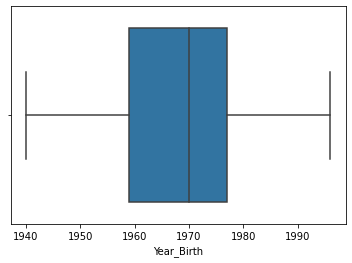

In [22]:
sns.boxplot(x=data_df['Year_Birth'])
plt.show()

<Figure size 1296x1152 with 0 Axes>

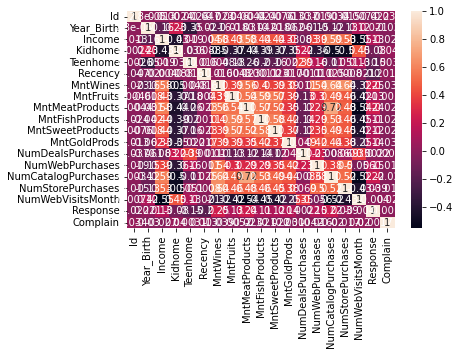

<Figure size 1296x1152 with 0 Axes>

In [23]:
sns.heatmap(data.corr(),annot=True)
plt.figure(figsize=(18,16))

In [24]:
data.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [25]:
data['Income'].fillna(data['Income'].median(),inplace=True)


In [26]:
data.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [27]:
data.drop(columns=['Id','Dt_Customer'],inplace=True)


In [28]:
data=pd.get_dummies(data,drop_first=True)


In [29]:
x=data.drop('Response',axis=1)
y=data['Response']

# Handling imbalanced data set

In [30]:
from imblearn.over_sampling import RandomOverSampler

ROS= RandomOverSampler()

x_new,y_new = ROS.fit_resample(x,y)
print(y_new.value_counts())

1    1906
0    1906
Name: Response, dtype: int64


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Logistic Regression Algorithm

In [33]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x,y,cv=5)
print(score)
print(score.mean())

0.875
0.8601190476190477
[0.75669643 0.85714286 0.85491071 0.86160714 0.85491071]
0.8370535714285714


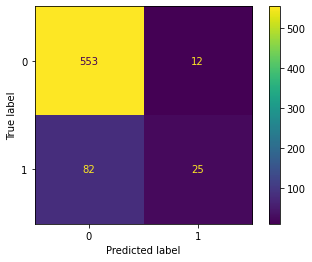

In [35]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model,x_test,y_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,ypred_test))
print(classification_report(y_test,ypred_test))

[[553  12]
 [ 82  25]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       565
           1       0.68      0.23      0.35       107

    accuracy                           0.86       672
   macro avg       0.77      0.61      0.63       672
weighted avg       0.84      0.86      0.83       672



# logistic regression has 86% accuracy

# KNN Algorithm

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))



from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x,y,cv=5)
print(score)

print(score.mean())

0.8852040816326531
0.8467261904761905
[0.82589286 0.80580357 0.83705357 0.84598214 0.83035714]
0.8290178571428571


In [38]:
from sklearn.model_selection import GridSearchCV

estimator = KNeighborsClassifier()

param_grid = {'n_neighbors': list(range(1,50)),'p':[1,2]}

full_cv_classifier = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
full_cv_classifier.fit(x_train,y_train)

full_cv_classifier.best_params_

{'n_neighbors': 6, 'p': 2}

In [39]:
# Rebuilt the model with best parameters
model = KNeighborsClassifier(n_neighbors=6,p=2)
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

0.8692602040816326
0.8452380952380952


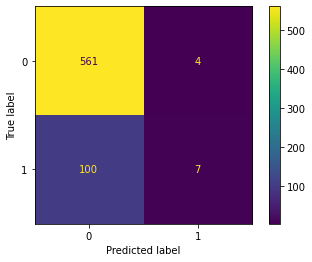

In [40]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model,x_test,y_test)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,ypred_test))
print(classification_report(y_test,ypred_test))

[[561   4]
 [100   7]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       565
           1       0.64      0.07      0.12       107

    accuracy                           0.85       672
   macro avg       0.74      0.53      0.52       672
weighted avg       0.81      0.85      0.79       672



# KNN has 85% accuracy

# SVM algorithm

In [42]:
from sklearn.svm import SVC
model= SVC()
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))



from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x,y,cv=5)
print(score)

print(score.mean())

0.8903061224489796
0.8556547619047619
[0.85044643 0.85044643 0.85044643 0.85044643 0.85267857]
0.8508928571428571


In [43]:
from sklearn.model_selection import GridSearchCV

estimator = SVC()

param_grid = {'C':[1,50],'kernel':['linear','rbf','sigmoid','poly']}

grid = GridSearchCV(estimator, param_grid,cv=5)
grid.fit(x_train,y_train)

grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [44]:
model = SVC(C=1,kernel='rbf')
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

0.8903061224489796
0.8556547619047619


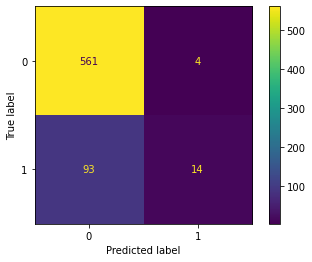

In [45]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model,x_test,y_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,ypred_test))
print(classification_report(y_test,ypred_test))

[[561   4]
 [ 93  14]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       565
           1       0.78      0.13      0.22       107

    accuracy                           0.86       672
   macro avg       0.82      0.56      0.57       672
weighted avg       0.85      0.86      0.81       672



# SVC has 86% accuracy  it is good model

# Random forest tree

In [47]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))



from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x,y,cv=5)
print(score)

print(score.mean())

0.9929846938775511
0.8645833333333334
[0.17410714 0.734375   0.83705357 0.85491071 0.85491071]
0.6910714285714286


In [48]:
from sklearn.model_selection import GridSearchCV

estimator = RandomForestClassifier()

param_grid = {'n_estimators': list(range(1,100))}

grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)

grid.best_params_

{'n_estimators': 57}

In [49]:
model = RandomForestClassifier(n_estimators=92)
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

0.9929846938775511
0.8705357142857143


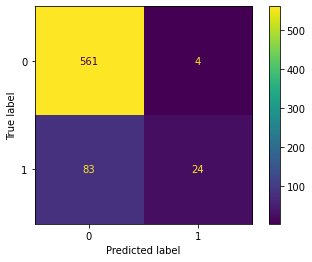

In [50]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model,x_test,y_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,ypred_test))
print(classification_report(y_test,ypred_test))

[[561   4]
 [ 83  24]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       565
           1       0.86      0.22      0.36       107

    accuracy                           0.87       672
   macro avg       0.86      0.61      0.64       672
weighted avg       0.87      0.87      0.84       672



# Random Forest has 87% accuracy it is good model

# Ada Boosting

In [52]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test =  model.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
score= cross_val_score(model,x,y,cv=5)
print(score)
print(score.mean())

0.8832908163265306
0.8675595238095238
[0.18973214 0.57142857 0.67410714 0.60044643 0.85267857]
0.5776785714285714


In [53]:
from sklearn.model_selection import GridSearchCV

estimator = AdaBoostClassifier()

param_grid = {'n_estimators': list(range(1,100))}

grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)

grid.best_params_

{'n_estimators': 44}

In [54]:
# Rebuilt the model with best parameters
model = AdaBoostClassifier(n_estimators=44)
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

0.8845663265306123
0.8616071428571429


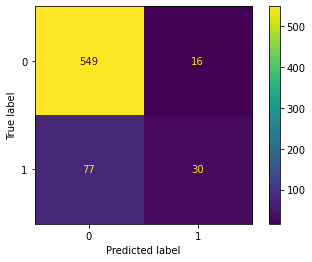

In [55]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model,x_test,y_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,ypred_test))
print(classification_report(y_test,ypred_test))

[[549  16]
 [ 77  30]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       565
           1       0.65      0.28      0.39       107

    accuracy                           0.86       672
   macro avg       0.76      0.63      0.66       672
weighted avg       0.84      0.86      0.84       672



# Ada boost has 86% accuracy  it is good model

# Gradient boost Algorithm

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))


from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x,y,cv=5)
print(score)
print(score.mean())

0.9445153061224489
0.8616071428571429
[0.16517857 0.31696429 0.57366071 0.60714286 0.85267857]
0.503125


In [58]:
from sklearn.model_selection import GridSearchCV

estimator= GradientBoostingClassifier()

param_grid = {"n_estimators":[1,200],"learning_rate":[0.01,0.2,0.3,0.5,0.8,1]}

grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)

grid.best_params_

{'learning_rate': 0.2, 'n_estimators': 200}

In [59]:
model = GradientBoostingClassifier(learning_rate=0.2,n_estimators=200)
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

0.9885204081632653
0.875


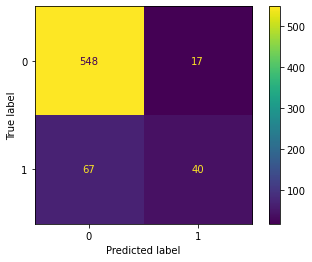

In [60]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model,x_test,y_test)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,ypred_test))
print(classification_report(y_test,ypred_test))

[[548  17]
 [ 67  40]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       565
           1       0.70      0.37      0.49       107

    accuracy                           0.88       672
   macro avg       0.80      0.67      0.71       672
weighted avg       0.86      0.88      0.86       672



# Gradient boost classifier has 88 % accuracy it is good model

# XG Boost Algorithm

In [62]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [63]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test =  model.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
score= cross_val_score(model,x,y,cv=5)
print(score)
print(score.mean())

0.9929846938775511
0.8720238095238095
[0.16517857 0.26116071 0.39508929 0.24330357 0.85267857]
0.3834821428571428


In [64]:
from sklearn.model_selection import GridSearchCV

estimator= XGBClassifier()

param_grid = {"n_estimators":[1,100],
              'max_depth': [3,4,5],
              'gamma':[0,0.1,0.2,0.3,0.5,1]}

grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)

grid.best_params_

{'gamma': 1, 'max_depth': 3, 'n_estimators': 100}

In [65]:
model = XGBClassifier(max_depth=3,gamma=1,n_estimators=100)
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

0.9604591836734694
0.8735119047619048


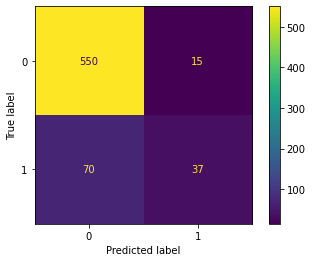

In [66]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model,x_test,y_test)

In [67]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,ypred_test))
print(classification_report(y_test,ypred_test))

[[550  15]
 [ 70  37]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       565
           1       0.71      0.35      0.47       107

    accuracy                           0.87       672
   macro avg       0.80      0.66      0.70       672
weighted avg       0.86      0.87      0.85       672



# XGB  has 87%  accuracy it is a good model

# Naive Bayes therom

In [68]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))



from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x,y,cv=5)
print(score)
print(score.mean())

0.7633928571428571
0.7633928571428571
[0.68303571 0.75669643 0.76339286 0.79241071 0.83705357]
0.7665178571428571


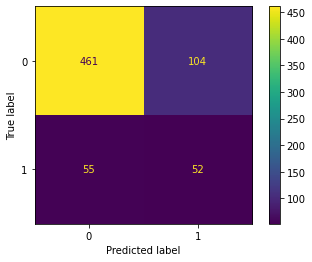

In [69]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model,x_test,y_test)

In [70]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,ypred_test))
print(classification_report(y_test,ypred_test))

[[461 104]
 [ 55  52]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       565
           1       0.33      0.49      0.40       107

    accuracy                           0.76       672
   macro avg       0.61      0.65      0.62       672
weighted avg       0.80      0.76      0.78       672



# Naive Bayes has 76% accuracy